# Data Analysis of Singapore's Housing & Development Board

This notebook was created to conduct data analysis and data visualization on the state of public housing in Singapore. This assignment is part of Singapore Polytechnic's `IT8701 - Introduction to Programming for Data Science`. 

We'll be using datasets from the [Housing & Development Board (HDB)](https://www.hdb.gov.sg/cs/infoweb/homepage), the statutary board under the Ministry of National Development responsible for the public housing in Singapore.

The notebook is structured as follows:

**Part 1 - Public Housing Market Overview**

- Dataset: [Dwelling Units Under HDB's Management](https://beta.data.gov.sg/collections/165/view) 

**Part 2 - Town Growth: Mature & New Estates**

- Dataset: [Dwelling Units Under HDB's Management](https://beta.data.gov.sg/collections/165/view) 

**Part 3 - Town Profiles: Mature Vs. New Estates**

- Dataset: [Dwelling Units Under HDB's Management](https://beta.data.gov.sg/collections/165/view) 

**Part 4 - HDB Resale Price Index**

- Dataset: [HDB Resale Price Index](https://beta.data.gov.sg/collections/152/view) 

**Part 5 - HDB Resale Flat Prices**

- Dataset: [Resale Transaction by Flat Type](https://beta.data.gov.sg/collections/167/view)

In this assignemnt, we will only be using [Numpy](https://numpy.org/doc/stable/index.html) and [Matplotlib](https://matplotlib.org/stable/).
***

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set colour palette
color1='#ECF4D6'
color2='#9AD0C2'
color3='#2D9596'
color4='#265073'
color5='#11235A'
color6='#596FB7'
color7='#C6CF9B'
color8='#F6ECA9'
color9='#5F0F40'
color10= '#FB8B24'
color11= '#E36414'
color12= '#9A031E'
color13='#cccccc'

color_palette1 = [color1,color2,color3,color4]
color_palette2 = [color5,color6,color7,color8]
color_palette3 = [color9,color10,color11,color12]

***

# 1. Public Housing Market Overview

In this section we will explore how the public residential market has grown for period from 2008 to 2021.

We will be looking at the two segments under HDB's purview:
- the dwelling units
- the rental units

**Datasets used for this section:**
- [Dwelling Units Under HDB's Management](https://beta.data.gov.sg/collections/165/view)

In [3]:
# load csv
dwellings = np.genfromtxt('DwellingUnitsunderHDBsManagementbyTownandFlatType.csv',
                          skip_header=1, 
                          names=['financial_year',
                                 'town_or_estate', 
                                 'flat_type', 
                                 'sold_or_rental',
                                 'no_of_dwelling_units'],
                          dtype=[('financial_year', '<u4'), 
                                 ('town_or_estate', 'U32'),
                                 ('flat_type', 'U12'),
                                 ('sold_or_rental', 'U12'),
                                 ('no_of_dwelling_units', 'i8')],
                          delimiter=",",
                          missing_values={'no_of_dwelling_units':'-'},
                          filling_values={'no_of_dwelling_units':0})

print(dwellings)
print()
print(f'Dataset shape: {dwellings.shape}')

[(2008, 'Ang Mo Kio', '1-room', 'Rental Units', 1318)
 (2008, 'Ang Mo Kio', '1-room', 'Sold Units',    0)
 (2008, 'Ang Mo Kio', '2-room', 'Rental Units', 2860) ...
 (2021, 'Yishun', 'Executive', 'Sold Units', 2741)
 (2021, 'Yishun', 'Studio Apart', 'Rental Units',    0)
 (2021, 'Yishun', 'Studio Apart', 'Sold Units',  734)]

Dataset shape: (4940,)


In [4]:
# create a helper function to get an overview of a dataset's unique values
def df_unique_values(df):
    for i in df.dtype.names:
        print(f'Column name: {i}')
        print(f'No. of unique values: {len(np.unique(df[i]))}')
        print(np.unique(df[i]))
        print()
        
df_unique_values(dwellings)

Column name: financial_year
No. of unique values: 14
[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]

Column name: town_or_estate
No. of unique values: 27
['Ang Mo Kio' 'Bedok' 'Bishan' 'Bukit Batok' 'Bukit Merah' 'Bukit Panjang'
 'Bukit Timah' 'Central Area' 'Choa Chu Kang' 'Clementi' 'Geylang'
 'Hougang' 'Jurong East' 'Jurong West' 'Kallang/Whampoa' 'Marine Parade'
 'Pasir Ris' 'Punggol' 'Queenstown' 'Sembawang' 'Sengkang' 'Serangoon'
 'Tampines' 'Tengah' 'Toa Payoh' 'Woodlands' 'Yishun']

Column name: flat_type
No. of unique values: 8
['1-room' '2-room' '3-room' '4-room' '5-room' 'Executive' 'HUDC'
 'Studio Apart']

Column name: sold_or_rental
No. of unique values: 2
['Rental Units' 'Sold Units']

Column name: no_of_dwelling_units
No. of unique values: 1264
[    0     1     2 ... 31760 32050 32153]



In [5]:
# split the datset according to rental vs. sold units
dwellings_sold = dwellings[dwellings['sold_or_rental'] == 'Sold Units']
dwellings_rental = dwellings[dwellings['sold_or_rental'] == 'Rental Units']

# check for duplicates
for i in [dwellings_sold, dwellings_rental]:
    print(f'Dataset rows: {i.shape[0]}')
    if len(np.unique(i)) == len(i):
        print('No duplicates.')
    else:
        print('Check for duplicates in this dataset.')
    print(i)
    print()

Dataset rows: 2732
No duplicates.
[(2008, 'Ang Mo Kio', '1-room', 'Sold Units',     0)
 (2008, 'Ang Mo Kio', '2-room', 'Sold Units',   633)
 (2008, 'Ang Mo Kio', '3-room', 'Sold Units', 24437) ...
 (2021, 'Yishun', '5-room', 'Sold Units', 10521)
 (2021, 'Yishun', 'Executive', 'Sold Units',  2741)
 (2021, 'Yishun', 'Studio Apart', 'Sold Units',   734)]

Dataset rows: 2208
No duplicates.
[(2008, 'Ang Mo Kio', '1-room', 'Rental Units', 1318)
 (2008, 'Ang Mo Kio', '2-room', 'Rental Units', 2860)
 (2008, 'Ang Mo Kio', '3-room', 'Rental Units',   62) ...
 (2021, 'Yishun', '4-room', 'Rental Units',    0)
 (2021, 'Yishun', '5-room', 'Rental Units',    0)
 (2021, 'Yishun', 'Studio Apart', 'Rental Units',    0)]



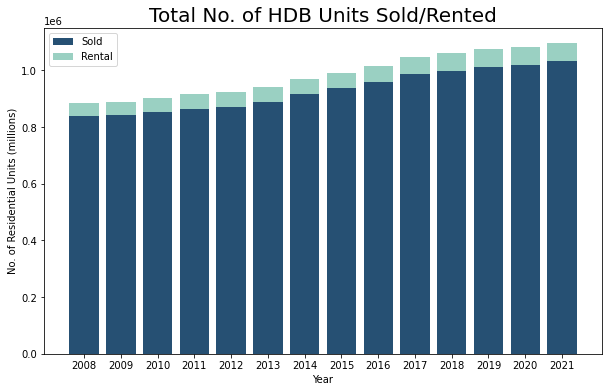

Total no. units sold as of 2008: 837883
Total no. units sold as of 2021: 1032699
No. of units sold between 2008 and 2021: 194816


In [6]:
# create empty lists to store the years, total units sold, and total units rented
years = list()
sums_sold = list()
sums_rental = list()

# loop through each year to obtain their respective no. of dwelling units
for i in np.unique(dwellings_sold['financial_year']):
    years.append(i)
    sums_sold.append(np.sum(dwellings_sold[dwellings_sold['financial_year'] == i]['no_of_dwelling_units']))
    sums_rental.append(np.sum(dwellings_rental[dwellings_rental['financial_year'] == i]['no_of_dwelling_units']))

# plot data with bar chart
plt.figure(figsize=(10, 6))  
plt.bar(years,
        sums_sold,
        color=color4,
        label='Sold')
# stack rental chart above sold units chart
plt.bar(years,
        sums_rental,
        color=color2,
        label='Rental',
        bottom=sums_sold)

plt.xlabel('Year')
plt.ylabel('No. of Residential Units (millions)')
plt.title('Total No. of HDB Units Sold/Rented', fontsize=20)
plt.xticks(years)
plt.legend()
plt.show()

print(f'Total no. units sold as of 2008: {sums_sold[0]}')
print(f'Total no. units sold as of 2021: {sums_sold[-1]}')
print(f'No. of units sold between 2008 and 2021: {sums_sold[-1] - sums_sold[0]}')

In [7]:
sold_units_growth = list()
sold_units_growth_pct = list()
rental_units_growth = list()
rental_units_growth_pct = list()

for i in range(1, len(years)):
    growth_num_sold = sums_sold[i] - sums_sold[i-1]
    sold_units_growth.append(growth_num_sold)
    growth_pct_sold = round(growth_num_sold / sums_sold[i-1] * 100, 2)
    sold_units_growth_pct.append(growth_pct_sold)
    
    growth_num_rental = sums_rental[i] - sums_rental[i-1]
    rental_units_growth.append(growth_num_rental)
    growth_pct_rental = round(growth_num_rental / sums_rental[i-1] * 100, 2)
    rental_units_growth_pct.append(growth_pct_rental)

<Figure size 720x432 with 0 Axes>

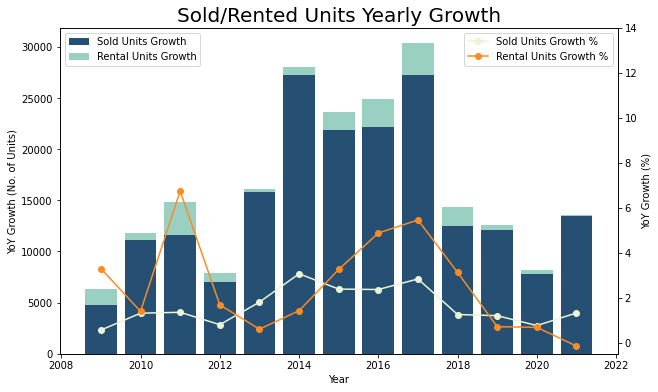

In [8]:
plt.figure(figsize=(10, 6))
fig, ax1 = plt.subplots(figsize=(10,6))

# plot bar chart of unit sales growth and rental growth
ax1.bar(years[1:],
        sold_units_growth,
        color=color4,
        label='Sold Units Growth')
ax1.bar(years[1:],
        rental_units_growth,
        color=color2,
        bottom=sold_units_growth,
        label='Rental Units Growth')

# initiate a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# plot line charts for y/y pct growth
ax2.plot(years[1:],
         sold_units_growth_pct,
         label='Sold Units Growth %',
         color=color1,
         marker='o')
ax2.plot(years[1:],
         rental_units_growth_pct,
         label='Rental Units Growth %',
         color=color10,
         marker='o')

# set labels and legend
ax1.set_xlabel('Year')
ax1.set_ylabel('YoY Growth (No. of Units)')
ax2.set_ylabel('YoY Growth (%)')
ax2.set_ylim(top=14)
plt.title('Sold/Rented Units Yearly Growth', fontsize=20)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

<u>**Analysis**<u>
    
As of 2021, HDB sold a total of 1,032,699 units (2008: 837,883), marking a 194,816 increase from 2008 figures.

The growth of units sold remained stable from 2008 to 2021, ranging between 0.6% to 3.1%. From 2014 to 2017, yearly growth rates held above 2.3% before registering a notable fall to 1.3% in 2018. This drop was driven by the cooling measures instituted in order to curtail an unsustainable property boom. Other than this governmental intervention, there were not much large changes in yearly growth rates.

On the other hand, the rental market experienced more volatile. Rental units saw yearly increases in its growth rate from 2013 to 2017 prior to declining from 2018 onwards. The fall in year-on-year growth rate coincided with the beginning of interest rates increases in 2018. As landlords pegged rental prices upwards to match the higher rates, rental demand fell.

**COVID Pandemic**

In 2021, the rental market's growth rate went into negative territory first time since 2008. However, this was during the extraodinary events of the COVID pandemic. As nations closed its borders to prevent the spread of the virus, the usual immigration flows into Singapore were disrupted. Hence with the implementation of strict quarantine directives and less immigrants entering the labour market, the demand for rental units declined.

In contrast, the number of units sold rebounded in 2021. The year saw pandemic restrictions loosening which allowed construction works resume. Consequently, 13,579 more units were sold that year, almost double that in 2020 but comparable to 2018-2019 figures.
***

# 2. Town Growth: Mature & New Estates

In 1992, HDB began classifying HDB towns/estates as mature and non-mature estates. 

- **Mature estates**: Estates where land for public housing development was limited yet demand was high.
- **Non-mature estates**: Estates where there was more land available for public housing development. These are usually less central, with fewer amenities and are therefore priced more affordably.

As of 2023, this was HDB's estate classification in Singapore:

| **Mature estates** | **Non-mature estates** |
| --- | --- |
| 1. Ang Mo Kio | 1. Bukit Batok |
| 2. Bedok | 2. Bukit Panjang |
| 3. Bishan | 3. Choa Chu Kang |
| 4. Bukit Merah | 4. Hougang |
| 5. Bukit Timah | 5. Jurong East |
| 6. Central Area | 6. Jurong West |
| 7. Clementi | 7. Punggol |
| 8. Geylang  | 8. Sembawang |
| 9. Kallang/ Whampoa  | 9. Sengkang |
| 10. Marine Parade  | 10. Tengah |
| 11. Pasir Ris  | 11. Woodlands |
| 12. Queenstown  | 12. Yishun |
| 13. Serangoon |  |
| 14. Tampines |  |
| 15. Toa Payoh | |

In this section we will cover the growth of Singapore's estates over the years. In particular, we aim to visualize each estate's overall growth.

**Datasets used for this section:**
- [Dwelling Units Under HDB's Management](https://beta.data.gov.sg/collections/165/view)

In [9]:
mature_estates = ['Ang Mo Kio', 'Bedok', 'Bishan',
                  'Bukit Merah', 'Bukit Timah', 'Central Area',
                  'Clementi', 'Geylang', 'Kallang/Whampoa',
                  'Marine Parade', 'Pasir Ris', 'Queenstown',
                  'Serangoon', 'Tampines', 'Toa Payoh']

new_estates = ['Bukit Batok', 'Bukit Panjang', 'Choa Chu Kang',
               'Hougang', 'Jurong East', 'Jurong West',
               'Punggol', 'Sembawang', 'Sengkang',
               'Tengah', 'Woodlands','Yishun']

In [10]:
unique_towns = np.unique(dwellings_sold['town_or_estate'])

# drop 'Tengah' from our dataset as its data is still empty
unique_towns = unique_towns[unique_towns != 'Tengah']

# create empty dictionary to store each town as a dict key
towns_dict = {town : [] for town in unique_towns}

for yr in years:
    for town in unique_towns:
        condition = (dwellings_sold['financial_year'] == yr) & (dwellings_sold['town_or_estate'] == town)
        sum_units = np.sum(dwellings_sold[condition]['no_of_dwelling_units'])
        towns_dict[town].append(sum_units)

In [11]:
# helper function to create dicitonaries to store yearly growth data
def create_growth_dict(town_set):
    growth_dict = {town : [] for town in town_set}
    
    for town, units in towns_dict.items():
        if town in growth_dict.keys():
            for i in range(1, len(units)):
                sum_units_growth = units[i] - units[i-1]
                growth_dict[town].append(sum_units_growth)
                
    return growth_dict

towns_growth_yearly = create_growth_dict(unique_towns)
mature_estates_growth_yearly = create_growth_dict(mature_estates)
new_estates_growth_yearly = create_growth_dict(new_estates)

In [12]:
# helper function to create dicitonaries to store summary of yearly growth data
def create_growth_dict_summary(town_set):
    summary_dict = {town : [] for town in town_set}
    
    for town in towns_dict.keys():
        if town in summary_dict.keys():
            starting = towns_dict[town][0]
            ending = towns_dict[town][-1]
            units_growth = ending - starting
            units_growth_pct = round(ending / starting -1, 3)

            for stat in [starting, ending, units_growth, units_growth_pct]:
                summary_dict[town].append(stat)
                
    return summary_dict

towns_growth_summary = create_growth_dict_summary(unique_towns)
# sort the dictionary by estate size
towns_growth_summary = dict(sorted(towns_growth_summary.items(),
                                   key=lambda item : item[1][1]))

# create individual dictionaries for mature and new estates
mature_estates_growth_summary = create_growth_dict_summary(mature_estates)
new_estates_growth_summary = create_growth_dict_summary(new_estates)

In [13]:
biggest_towns_2008 = dict(sorted(towns_growth_summary.items(), key=lambda item : item[1][0], reverse=True)[0:5])
biggest_towns_2021 = dict(sorted(towns_growth_summary.items(), key=lambda item : item[1][1], reverse=True)[0:5])
fastest_growth_towns = dict(sorted(towns_growth_summary.items(), key=lambda item : item[1][3], reverse=True)[0:5])

print(biggest_towns_2008)
print()
print(biggest_towns_2021)
print()
print(fastest_growth_towns)

{'Jurong West': [66050, 72230, 6180, 0.094], 'Tampines': [61799, 72750, 10951, 0.177], 'Bedok': [56496, 60245, 3749, 0.066], 'Woodlands': [56479, 66144, 9665, 0.171], 'Hougang': [47234, 56035, 8801, 0.186]}

{'Tampines': [61799, 72750, 10951, 0.177], 'Jurong West': [66050, 72230, 6180, 0.094], 'Sengkang': [42570, 69113, 26543, 0.624], 'Woodlands': [56479, 66144, 9665, 0.171], 'Yishun': [46518, 63402, 16884, 0.363]}

{'Punggol': [17103, 53543, 36440, 2.131], 'Sengkang': [42570, 69113, 26543, 0.624], 'Sembawang': [17664, 28492, 10828, 0.613], 'Bukit Batok': [31685, 43864, 12179, 0.384], 'Yishun': [46518, 63402, 16884, 0.363]}


<Figure size 720x432 with 0 Axes>

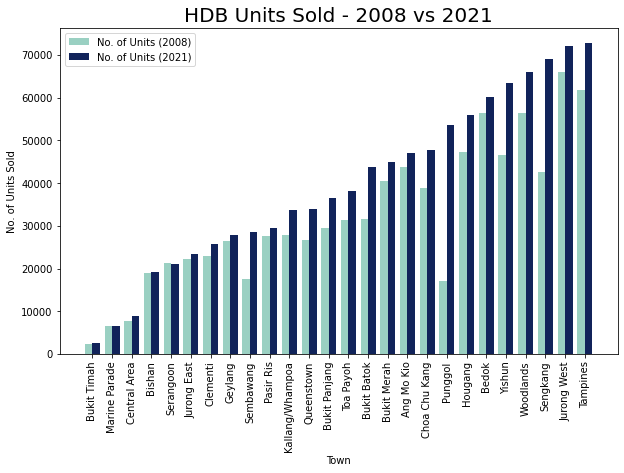

In [14]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10,6))

towns = list(towns_growth_summary.keys())
units_start = [v[0] for v in towns_growth_summary.values()]
units_end = [v[1] for v in towns_growth_summary.values()]

# create an array of x-positions for each town
x_positions = np.arange(len(towns))

# set the width of each bar because we are going to set each town's bar side by side
bar_width = 0.38

# plot the sold units growth
ax.bar(x_positions - bar_width / 2,  # Adjust x-positions to the left
       units_start,
       width=bar_width,
       color=color2,
       label='No. of Units (2008)')

# plot the rental units growth
ax.bar(x_positions + bar_width / 2,  # Adjust x-positions to the right
       units_end,
       width=bar_width,
       color=color5,
       label='No. of Units (2021)')

ax.set_xticks(x_positions)
ax.set_xticklabels(towns, rotation=90)
ax.set_xlabel('Town')
ax.set_ylabel('No. of Units Sold')
ax.set_title('HDB Units Sold - 2008 vs 2021', fontsize=20)
ax.legend()

plt.show()

<u>**Analysis**<u>

| 2008 Rank | Estate (2008) | Units (2008) | 2021 Rank | Estate (2021) | Units (2021) |
|-----------|---------------|--------------|-----------|---------------|--------------|
| 1         | Jurong West   | 66,050       | 1         | Tampines      | 72,750       |
| 2         | Tampines      | 61,799       | 2         | Jurong West   | 72,230       |
| 3         | Bedok         | 56,496       | 3         | Sengkang      | 69,113       |
| 4         | Woodlands     | 56,479       | 4         | Woodlands     | 66,144       |
| 5         | Hougang       | 47,234       | 5         | Yishun        | 63,402       |

Over the 13-year period, both Jurong West and Tampines retained their top-2 spots, with the latter pipping the former to the top by the end of 2021.

While Woodlands maintained its rank in the top 5, two new estates - Sengkang and Yishun -  experienced rapid development during this period, making up the remaining top estates.

Zooming into estate growth, the table below summarizes the estates with the highest growth rates:

| Estate        | Units (2008) | Units (2021) | Change   | Growth Rate |
|:--------------|-------------:|-------------:|---------:|------------:|
| Punggol       | 17,103       | 53,543       | 36,440   | 213.1%      |
| Sengkang      | 42,570       | 69,113       | 26,543   | 62.4%       |
| Sembawang     | 17,664       | 28,492       | 10,828   | 61.3%       |
| Bukit Batok   | 31,685       | 43,864       | 12,179   | 38.4%       |
| Yishun        | 46,518       | 63,402       | 16,884   | 36.3%       |

Unsurprisingly, these estates were all non-mature estates. 

Punggol grew the fastest, expanding threefold from 17,103 units in 2008 to 53,543 units ny the end of 2021. Situated in the north-east of Singapore, the former farmland was earmarked for urban renewal to meet the residential demand of new homeowners.

Sengkang, also in the north-east and located next to Punggol, grew by more than 60% and added 26,543 units.

As we noted above, 194,816 new HDB units were sold during the 2008-2021 period. Of which, a third of them (62,983 units) were in Punggol and Sengkang. Collectively, 102,874 units were sold in the top five fastest growing estates, which was more than half of the total sold during this period.
    
Given that the central locations in Singapore have already been developed, this outward shift is part of the Ministry of National Development's efforts to reduce congestion while accommodating new homeowners' residential demand.
***

# 3. Town Profiles: Mature Vs. New Estates

In this section, we will examine how the new estates compare to the mature ones. We will look at the profiles of flats sold in each estate type see and analyze how they have changed through the passage of time.

**Datasets used for this section:**
- [Dwelling Units Under HDB's Management](https://beta.data.gov.sg/collections/165/view)

In [15]:
# helper function to create dictionaries
def create_estate_profile(year, estate_type):
    estate_profile = {flat_type: 0 for flat_type in np.unique(dwellings_sold['flat_type'])}
    
    # loop through the unique flat types
    for flat_type in estate_profile.keys():
        # set conditions for specified year, flat type and specified estate type
        conditions = (
            (dwellings_sold['financial_year'] == year) & 
            (dwellings_sold['flat_type'] == flat_type) & 
            np.isin(dwellings_sold['town_or_estate'], estate_type)
        )
        # sum up the no. of units once conditions are met
        sum_units = np.sum(dwellings_sold[conditions]['no_of_dwelling_units'])
        estate_profile[flat_type] = sum_units
        
    return estate_profile

In [16]:
new_estates_profile_2008 = create_estate_profile(2008, new_estates)
new_estates_profile_2021 = create_estate_profile(2021, new_estates)
mature_estates_profile_2008 = create_estate_profile(2008, mature_estates)
mature_estates_profile_2021 = create_estate_profile(2021, mature_estates)

print(f'New Estate Units Sold as of 2008: {sum(new_estates_profile_2008.values())}')
print(f'New Estate Units Sold as of 2021: {sum(new_estates_profile_2021.values())}')
print(f'New Estate Units Sold during 2008-2021: {sum(new_estates_profile_2021.values())-sum(new_estates_profile_2008.values())}')
print()
print(f'Mature Estate Units Sold as of 2008: {sum(mature_estates_profile_2008.values())}')
print(f'Mature Estate Units Sold as of 2021: {sum(mature_estates_profile_2021.values())}')
print(f'Mature Estate Units Sold during 2008-2021: {sum(mature_estates_profile_2021.values())-sum(mature_estates_profile_2008.values())}')

New Estate Units Sold as of 2008: 415955
New Estate Units Sold as of 2021: 560535
New Estate Units Sold during 2008-2021: 144580

Mature Estate Units Sold as of 2008: 421928
Mature Estate Units Sold as of 2021: 472164
Mature Estate Units Sold during 2008-2021: 50236


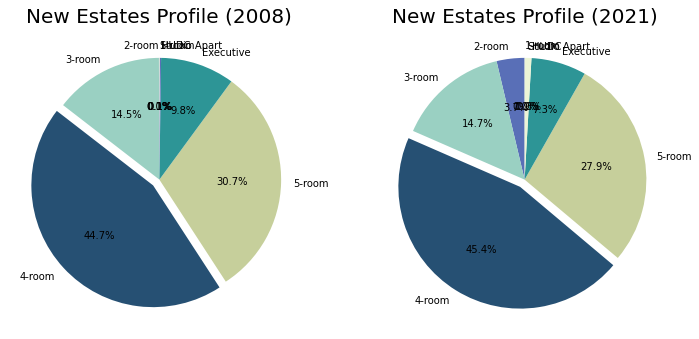

{'1-room': 0, '2-room': 258, '3-room': 60151, '4-room': 185773, '5-room': 127888, 'Executive': 40951, 'HUDC': 622, 'Studio Apart': 312}

{'1-room': 0, '2-room': 20763, '3-room': 82668, '4-room': 254599, '5-room': 156515, 'Executive': 40958, 'HUDC': 0, 'Studio Apart': 5032}


In [17]:
# set subplot to 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 12))  

# set pie chart explosion for 4-room flat type
explode = (0.0, 0.0, 0.0, 0.07, 0.0, 0.0, 0.0, 0.0)
colors = [color5, color6, color2,
          color4, color7, color3,
          color6, color1]

# plot pie chart for 2008
labels = new_estates_profile_2008.keys()
sizes = new_estates_profile_2008.values()
axs[0].pie(sizes,
           labels=labels,
           startangle=90,
           autopct='%1.1f%%',
           explode=explode,
           colors=colors)
axs[0].set_title('New Estates Profile (2008)', fontsize=20)

# plot pie chart for 2021
labels = new_estates_profile_2021.keys()
sizes = new_estates_profile_2021.values()
axs[1].pie(sizes,
           labels=labels,
           startangle=90,
           autopct='%1.1f%%',
           explode=explode,
           colors=colors)
axs[1].set_title('New Estates Profile (2021)', fontsize=20)

plt.show()

print(new_estates_profile_2008)
print()
print(new_estates_profile_2021)

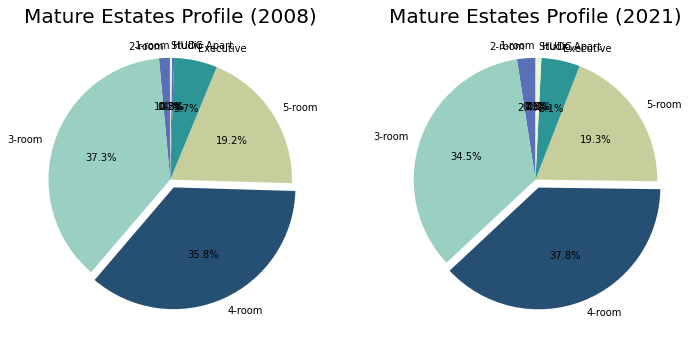

{'1-room': 258, '2-room': 5982, '3-room': 157247, '4-room': 150966, '5-room': 81181, 'Executive': 24124, 'HUDC': 1243, 'Studio Apart': 927}

{'1-room': 254, '2-room': 11248, '3-room': 163024, '4-room': 178579, '5-room': 91225, 'Executive': 24158, 'HUDC': 0, 'Studio Apart': 3676}


In [18]:
# set subplot to 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

# plot pie chart for 2008
labels = mature_estates_profile_2008.keys()
sizes = mature_estates_profile_2008.values()
axs[0].pie(sizes,
           labels=labels,
           startangle=90,
           autopct='%1.1f%%', 
           explode=explode,
           colors=colors)
axs[0].set_title('Mature Estates Profile (2008)', fontsize=20)

# plot pie chart for 2021
labels = mature_estates_profile_2021.keys()
sizes = mature_estates_profile_2021.values()
axs[1].pie(sizes,
           labels=labels,
           startangle=90,
           autopct='%1.1f%%',
           explode=explode,
           colors=colors)
axs[1].set_title('Mature Estates Profile (2021)', fontsize=20)

plt.show()

print(mature_estates_profile_2008)
print()
print(mature_estates_profile_2021)

### Analysis

**Mature Estates**

As of 2008, most of the flat types sold in mature estates were 3-room flats (37.3%), which was closely followed by 4-room flats (35.8%). By the end of 2021, 4-room flats overtook 3-room flats to become the most sold flat type.
    
**New Estates**

As of 2008, most of the flat types sold in new estates were 4-room flats, making up 44.7% of HDB's transactions in these estates. As of 2021, that figure creeped upwards to 45.4% as more 4-room flats were built.

While the proportion of 3-room flats remained stable, the bigger units - 5-room flats and executive flats - fell from a combined share of 40.5% in 2008 to 35.2% in 2021. In contrast, there was a noticeable increase in 2-room flats. Limited to just a couple of hundreds in 2008, by the end of 2021, they've grown to 20,763 units, making up 3.7% of units sold.
    
**Mature Vs. New Estates**
    
From 2008 to 2021, there were an additional 194,816 residential units sold by HDB. Of these, 74.2% (144,580 units) were sold in new estates while the remaining 25.8% (50,236 units) were sold in mature estates.
    
As can be visualized in the pie charts above, the profiles of mature and new estates are clearly different. A key distinction between both estate types is the proportion of 3-room flats. As of 2021, this flat type made up more than a third of flats sold mature estates compared to just 14.7% in new estates.     
  
A common theme shared by mature and new estates is the upward trend of 4-room flats sales. While this flat type have been predominant in new estates, it was only in recent times that this became characteristic of mature estates. 
    
In line with with the government's stated concern of space constraints, we can expect more 4-room flats to be built as compared to the larger unit types.
***

# 4. HDB Resale Price Index

Previously we focused on the residential units sold directly by HDB.

In this section, we will use the HDB Resale Price Index to examine the trend of resale flats' value and how returns are distributed.

**Datasets used for this section:**

- [HDB Resale Price Index](https://beta.data.gov.sg/collections/152/view)

In [19]:
resale_price_index = np.genfromtxt(
    'HousingAndDevelopmentBoardResalePriceIndex1Q2009100Quarterly.csv',
    skip_header=1, 
    dtype=[('Quarter', 'U12'),('Index', 'f8')],
    delimiter=",")

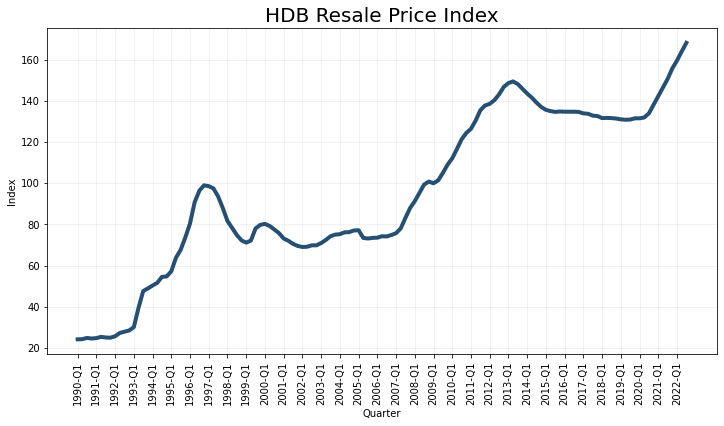

In [20]:
plt.figure(figsize=(12,6))

# get the current axes
ax = plt.gca() 

# plot the quarter on y-axis, index on x-axis
plt.plot(resale_price_index['Quarter'],
         resale_price_index['Index'],
         linewidth=4, color=color4)

# add x ticks position for formatting
x_positions = np.arange(len(resale_price_index['Quarter']))
ax.set_xticks(x_positions)
ax.set_xticklabels(resale_price_index['Quarter'], rotation=90)
# space out x ticks to make the chart readable
ax.set_xticks(x_positions[::4])

ax.set_xlabel('Quarter')
ax.set_ylabel('Index')
ax.set_title('HDB Resale Price Index', fontsize=20)

# add a faint grid to make the chart more readable
ax.grid(True, alpha=0.2)

plt.show()

Text(0.5, 1.0, 'Quarterly Return % Distribution')

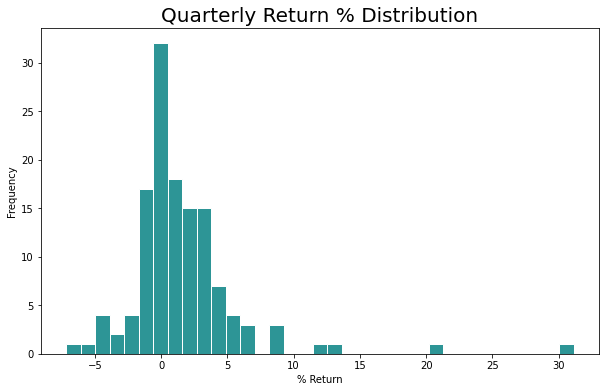

In [21]:
resale_price_change = list()

# loop through price index to obtain pct change for each quarter
for i in range(1,len(resale_price_index['Index'])):
    pct_chg = (resale_price_index['Index'][i] / resale_price_index['Index'][i-1] - 1) * 100
    resale_price_change.append(round(pct_chg,2))

# plot histogram for return distribution
plt.figure(figsize=(10,6))

plt.hist(resale_price_change,
         histtype='bar',
         bins=35,
         color=color3,
         edgecolor='white')

plt.xlabel('% Return')
plt.ylabel('Frequency')
plt.title('Quarterly Return % Distribution', fontsize=20)

### Analysis

The HDB resale market has been on a broad upward trend since 1990. Specifically, there were 3 periods of rapid increase: (i) 1992 to 1997, (ii) 2007 to 2014, and (iii) 2020 to present.

The returns distribution is positively skewed with most of the quarterly returns clustering around the 0% to 2% range. While there are periods of downtrends, quarterly price decreases are usually not as intense as price increases during uptrends. 
    
Having said that, there were 2 periods of major downswings. The first was in 1997 when the property boom was burst during the Asian Financial Crisis. The second was the period from 2013 to 2019 when the government implemented significant cooling measures in the years of 2013 and 2018 to prevent the market from overheating.

**COVID Pandemic**
    
Following the COVID pandemic in 2020, construction works were disrupted which delayed the delivery of new residential buildings. As a result, first-timers turned to the resale market, pushing up demand and flat prices. This is in addition to the rise of hybrid work arrangements during the nationwide lockdown as households saw the need for larger living spaces. The combination of high demand in a time of restricted supply means that the resale market will likely remain elevated.

Hence, until the new residential buildings are ready to house new homeowners, we can expect the current uptrend to continue.
***

# 5. HDB Resale Flat Prices

In this section we will explore the relationship between estate location and resale flat prices. Specifically, we want to know if being located in a mature or a new estate will impact the flat's resale price.

**Datasets used for this section:**
- [Resale Flat Prices (from Jan 2017 onwards)](https://beta.data.gov.sg/collections/189/view)

In [22]:
resale_flats = np.genfromtxt(
    'ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv',
    skip_header=1, 
    dtype=[('month', 'U12'),
           ('town', 'U32'),
           ('flat_type', 'U12'),
           ('block', 'U8'),
           ('street_name', 'U32'),
           ('storey_range', 'U16'),
           ('floor_area_sqm', 'U4'),
           ('flat_model', 'U32'),
           ('lease_commence_date', 'U4'),
           ('remaining_lease', 'U4'),
           ('resale_price', 'f8')
          ],
    delimiter=",")

print(resale_flats)
print()
print(f'Dataset shape: {resale_flats.shape}')

[('2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', '44', 'Improved', '1979', '61 y', 232000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03', '67', 'New Generation', '1978', '60 y', 250000.)
 ('2017-01', 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03', '67', 'New Generation', '1980', '62 y', 262000.)
 ...
 ('2023-12', 'YISHUN', 'EXECUTIVE', '826', 'YISHUN ST 81', '01 TO 03', '142', 'Apartment', '1988', '63 y', 780000.)
 ('2023-12', 'YISHUN', 'EXECUTIVE', '834', 'YISHUN ST 81', '01 TO 03', '142', 'Apartment', '1988', '63 y', 785000.)
 ('2023-12', 'YISHUN', 'MULTI-GENERA', '666', 'YISHUN AVE 4', '01 TO 03', '179', 'Multi Generation', '1987', '63 y', 975000.)]

Dataset shape: (168591,)


In [23]:
# change all towns to upper case as per dataset
temp_list_mature = []
temp_list_new = []

for i in towns:
    town = i.upper()
    if i in mature_estates:
        temp_list_mature.append(town)
    elif i in new_estates:
        temp_list_new.append(town)

mature_estates_cap = temp_list_mature
new_estates_cap = temp_list_new

print(mature_estates_cap)
print(new_estates_cap)

['BUKIT TIMAH', 'MARINE PARADE', 'CENTRAL AREA', 'BISHAN', 'SERANGOON', 'CLEMENTI', 'GEYLANG', 'PASIR RIS', 'KALLANG/WHAMPOA', 'QUEENSTOWN', 'TOA PAYOH', 'BUKIT MERAH', 'ANG MO KIO', 'BEDOK', 'TAMPINES']
['JURONG EAST', 'SEMBAWANG', 'BUKIT PANJANG', 'BUKIT BATOK', 'CHOA CHU KANG', 'PUNGGOL', 'HOUGANG', 'YISHUN', 'WOODLANDS', 'SENGKANG', 'JURONG WEST']


In [24]:
# separate dataset into mature estates and new estates
resale_flats_mature = resale_flats[np.isin(resale_flats['town'], mature_estates_cap)]
resale_flats_new = resale_flats[np.isin(resale_flats['town'], new_estates_cap)]

In [25]:
# create helper function to create dictionary for any variable in resale dataset
def create_resale_prices_dict(estate_array, column, target='resale_price'):
    
    estate_dict = {i : 0 for i in np.unique(estate_array[column])}
    
    for i in np.unique(estate_array[column]):
        estate_dict[i] = (estate_array[estate_array[column]== i][target])
        
    return estate_dict

resale_prices_mature = create_resale_prices_dict(resale_flats_mature, 'flat_type')
resale_prices_new_es = create_resale_prices_dict(resale_flats_new, 'flat_type')

median_mature_es = list()
print('Mature Estates Median Flat Price by Flat Type:')
for i in resale_prices_mature.keys():
    median = np.median(resale_prices_mature[i])
    print(f'{i}: {np.median(resale_prices_mature[i])}')
    median_mature_es.append(median)

median_new_es = list()
print()
print('New Estates Median Flat Price by Flat Type:')
for i in resale_prices_new_es.keys():
    median = np.median(resale_prices_new_es[i])
    print(f'{i}: {np.median(resale_prices_new_es[i])}')
    median_new_es.append(median)

Mature Estates Median Flat Price by Flat Type:
1 ROOM: 190000.0
2 ROOM: 242000.0
3 ROOM: 335000.0
4 ROOM: 530000.0
5 ROOM: 670000.0
EXECUTIVE: 750000.0
MULTI-GENERA: 849000.0

New Estates Median Flat Price by Flat Type:
2 ROOM: 276000.0
3 ROOM: 320000.0
4 ROOM: 435000.0
5 ROOM: 515000.0
EXECUTIVE: 625000.0
MULTI-GENERA: 782500.0


<Figure size 720x432 with 0 Axes>

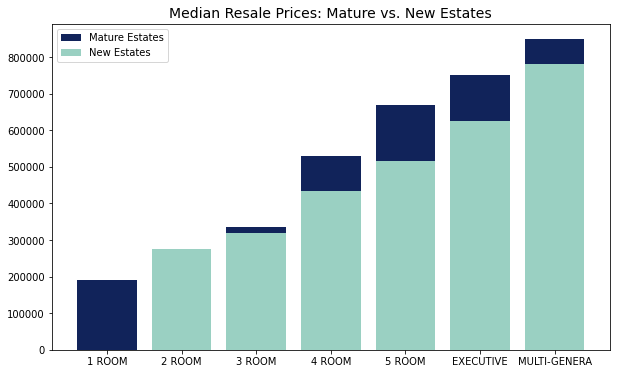

In [26]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(resale_prices_mature.keys(), median_mature_es, color=color5,
       label='Mature Estates')
ax.bar(resale_prices_new_es.keys(), median_new_es, color=color2,
       label='New Estates')

ax.set_title('Median Resale Prices: Mature vs. New Estates', fontsize=14)

ax.legend()
plt.show()

While the median 2-room flat is sold for more in new estates, every other flat type in mature estates command a price premium over those in new estates. Notably, there is not much of a price difference between the median 3-room flat sold in either estate.

Note: There were no 1-room resale flats sold in new estates.

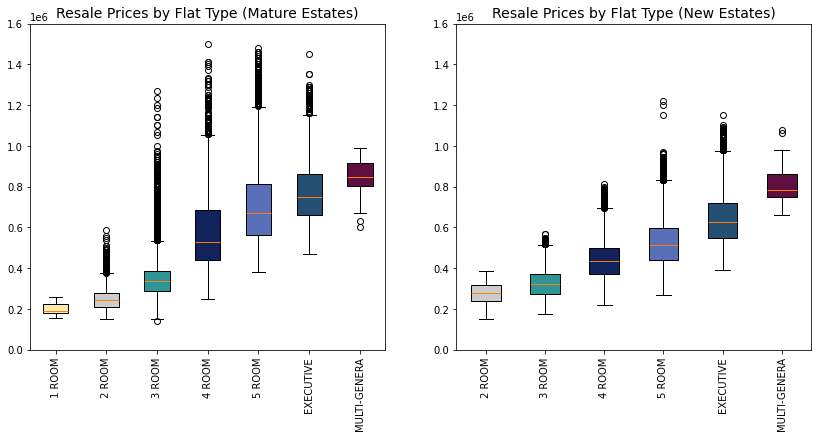

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  

# box plot for mature estates
bplot1 = axs[0].boxplot(resale_prices_mature.values(),
           labels=resale_prices_mature.keys(), patch_artist=True)

# box plot for new estates
bplot2 = axs[1].boxplot(resale_prices_new_es.values(),
           labels=resale_prices_new_es.keys(), patch_artist=True)

# manually set out color palette as they have different dict_key lengths
colors_mature = [color8, color13, color3, color5, color6, color4, color9]
colors_new_es = [color13, color3, color5, color6, color4, color9]

for patch, color in zip(bplot1['boxes'], colors_mature):
    patch.set_facecolor(color)
    
for patch, color in zip(bplot2['boxes'], colors_new_es):
    patch.set_facecolor(color)
    
# set the same scale for both
axs[0].set_ylim(0, 1600000)
axs[1].set_ylim(0, 1600000)

axs[0].set_title('Resale Prices by Flat Type (Mature Estates)', fontsize=14)
axs[1].set_title('Resale Prices by Flat Type (New Estates)', fontsize=14)

axs[0].set_xticklabels(resale_prices_mature.keys(), rotation=90)
axs[1].set_xticklabels(resale_prices_new_es.keys(), rotation=90)

plt.show()

### Analysis
    
From January 2017 to December 2023, the median resale flat price in mature estates was higher across all flat types (other than 2-room flats) relative to their counterparts in new estates. Additionally, there are noticeable price premiums for the median 4-room (+SGD95,000) and 5-room (+SGD155,000) flats in mature estates. 
    
Another notable observation of mature estates is their higher price variance as visualized through their boxplots' longer "bodies". While both estate types have outliers, the ones in mature estates are more widely spread out above the 75th percentile, with a number of them above the million dollar mark.

In the Town Profiles section above, our pie charts showed that 1-room flats made contributed to 0 sale transactions since 2008. Similarly, our box plot for new estates do not reflect this flat type.   
    
As the scope of our analysis only covers a broad overview, a deeper dive would uncover possible drivers for our findings above.

In [28]:
print('Mature Estates Median Flat Price:')
for town in mature_estates_cap:
    print(f"{town}: {np.median(resale_flats[resale_flats['town']== town]['resale_price'])}")
print()
print('New Estates Median Flat Price:')
for town in new_estates_cap:
    print(f"{town}: {np.median(resale_flats[resale_flats['town']== town]['resale_price'])}")

Mature Estates Median Flat Price:
BUKIT TIMAH: 725000.0
MARINE PARADE: 478000.0
CENTRAL AREA: 535444.0
BISHAN: 658000.0
SERANGOON: 498000.0
CLEMENTI: 473000.0
GEYLANG: 425000.0
PASIR RIS: 530000.0
KALLANG/WHAMPOA: 530000.0
QUEENSTOWN: 645000.0
TOA PAYOH: 440000.0
BUKIT MERAH: 620000.0
ANG MO KIO: 383000.0
BEDOK: 400000.0
TAMPINES: 500000.0

New Estates Median Flat Price:
JURONG EAST: 422000.0
SEMBAWANG: 440000.0
BUKIT PANJANG: 455000.0
BUKIT BATOK: 418000.0
CHOA CHU KANG: 452000.0
PUNGGOL: 495000.0
HOUGANG: 458000.0
YISHUN: 398000.0
WOODLANDS: 418888.0
SENGKANG: 475000.0
JURONG WEST: 430000.0


In [29]:
median_mature_es = []
for town in mature_estates_cap:
    median = np.median(resale_flats[resale_flats['town']== town]['resale_price'])
    median_mature_es.append(median)
    
print(f'Mean of Median Resale Flat Price in Mature Estates: SGD{round(np.mean(median_mature_es))}')
print(f'Std Dev of Median Resale Flat Price in Mature Estates: SGD{round(np.std(median_mature_es))}')
print()

median_new_es = []
for town in new_estates_cap:
    median = np.median(resale_flats[resale_flats['town']== town]['resale_price'])
    median_new_es.append(median)

print(f'Mean of Median Resale Flat Price in New Estates: SGD{round(np.mean(median_new_es))}')
print(f'Std Dev of Median Resale Flat Price in New Estates: SGD{round(np.std(median_new_es))}')

Mean of Median Resale Flat Price in Mature Estates: SGD522696
Std Dev of Median Resale Flat Price in Mature Estates: SGD96773

Mean of Median Resale Flat Price in New Estates: SGD441990
Std Dev of Median Resale Flat Price in New Estates: SGD26997


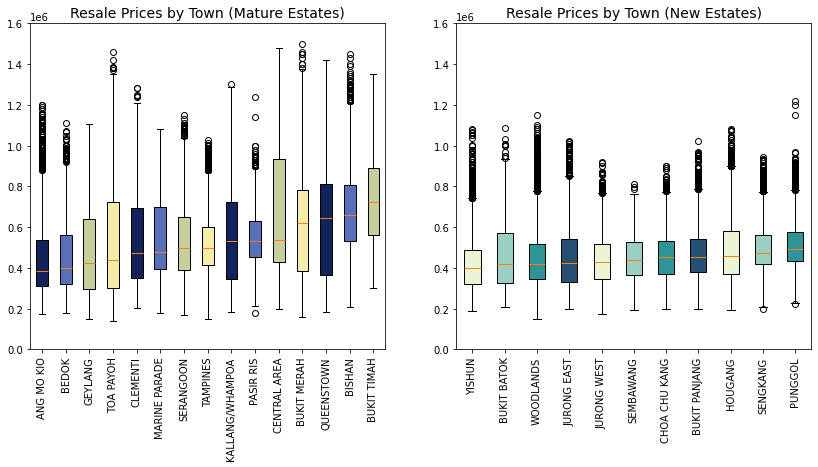

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  

mature_es_prices = create_resale_prices_dict(resale_flats_mature, 'town')
mature_es_prices = dict(sorted(mature_es_prices.items(),key=lambda item : np.median(item[1][0:])))

new_es_prices = create_resale_prices_dict(resale_flats_new, 'town')
new_es_prices = dict(sorted(new_es_prices.items(),key=lambda item : np.median(item[1][0:])))

# box plot for mature estates
bplot1 = axs[0].boxplot(mature_es_prices.values(),
           labels=mature_es_prices.keys(), patch_artist=True)

# box plot for new estates
bplot2 = axs[1].boxplot(new_es_prices.values(),
           labels=new_es_prices.keys(), patch_artist=True)

colors1 = color_palette2 * 4
colors2 = color_palette1 * 4

for patch, color in zip(bplot1['boxes'], colors1):
    patch.set_facecolor(color)
    
for patch, color in zip(bplot2['boxes'], colors2):
    patch.set_facecolor(color)

# set the same scale for both
axs[0].set_ylim(0, 1600000)
axs[0].set_xticklabels(mature_es_prices.keys(), rotation=90)

axs[1].set_ylim(0, 1600000)
axs[1].set_xticklabels(new_es_prices.keys(), rotation=90)
axs[0].set_title('Resale Prices by Town (Mature Estates)', fontsize=14)
axs[1].set_title('Resale Prices by Town (New Estates)', fontsize=14)

plt.show()

### Analysis

**Resale Prices by Town**
 
Building on our analysis above comparing resale flat prices in mature and new estates, we now look at median resale flat prices for each individual estate.
    
Across the new estates, using the mean of median prices, we find that there isn't much variance. The majority of median prices hover around the SGD440,000 range and the standard deviation of these prices is ~SGD27,000.
    
On the other hand, the mean of median resale prices across mature estates is ~SGD520,000 while the standard deviation stands at ~SGD97,000. This comparatively higher variance is reflected in the box plots' long bodies.
    
A closer look at the box plots reveals that the mature estates are more dissimilar as a group than the new estates. For example, we see mature estates like Tampines and Pasir Ris having distinctly shorter bodies than the rest of its peers while estates such as Central Area and Queenstown have much longer ones. Meanwhile, the new estates' boxplot body lengths are more uniform.

**Higher Variance in Mature Estate Resale Prices**
    
Based on our analysis in previous sections, there are two possible explanations for this.
    
Firstly, the profile of mature estates are more diverse than new estates. 3-room flats make up 35% of the flats while 4-room flats make up 38%. This is an important consideration because there is a significant SGD200,000 price difference between the median 3-room and 4-room flats in mature estates. In contrast, only 15% of flats in new estates are 3-room flats while 45% of them are 4-room flats, making them less dissimilar.
    
Estates such as Central Area carry both smaller and bigger flat types within them which could explain their long boxplot bodies.
    
Secondly, new estates are all located at a farther distance away from the centre of Singapore. For mature estates, the proximity to central Singapore differs from town to town. For examples, estates such as Bukit Timah and Bishan are much closer to downtown compared to places like Bedok or Clementi. 

Hence, the median resale price for mature estates falls along a much wider spectrum than those in new estates.
    
***